<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/all_currencies.csv')
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600428 entries, 0 to 600427
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  600428 non-null  int64  
 1   Date        600428 non-null  object 
 2   Symbol      600428 non-null  object 
 3   Open        600428 non-null  float64
 4   High        600428 non-null  float64
 5   Low         600428 non-null  float64
 6   Close       600428 non-null  float64
 7   Volume      595511 non-null  float64
 8   Market Cap  538854 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.2+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600428 entries, 0 to 600427
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  600428 non-null  int64         
 1   Date        600428 non-null  datetime64[ns]
 2   Symbol      600428 non-null  object        
 3   Open        600428 non-null  float64       
 4   High        600428 non-null  float64       
 5   Low         600428 non-null  float64       
 6   Close       600428 non-null  float64       
 7   Volume      595511 non-null  float64       
 8   Market Cap  538854 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 41.2+ MB


In [17]:
df.groupby(df['Date'].dt.year).sum(numeric_only = True)
price_by_year = df.groupby(df['Date'].dt.year)['Close'].sum(numeric_only = True).reset_index()

In [19]:
price_by_year.rename(columns={'Date': 'Year', 'Close':'Close Price'}, inplace = True)
price_by_year

,Year,Close Price
0,2013,7.332313e+04
1,2014,1.371445e+07
2,2015,4.276797e+05
3,2016,2.905734e+05
4,2017,6.033495e+07
5,2018,5.215758e+07


In [20]:
year = list(price_by_year['Year'])
year

[2013, 2014, 2015, 2016, 2017, 2018]

In [22]:
price = list(price_by_year['Close Price'])
price

[73323.13050933,
 13714445.823103989,
 427679.6635962919,
 290573.3672418712,
 60334951.08673707,
 52157576.05488593]

## **Functional Method**

This method is simpler and easie, great for informal visualizations. The issue is that these plots are harder to manage when there are multiple figures or subplots.

Text(0.5, 1.0, 'Close Price by Year')

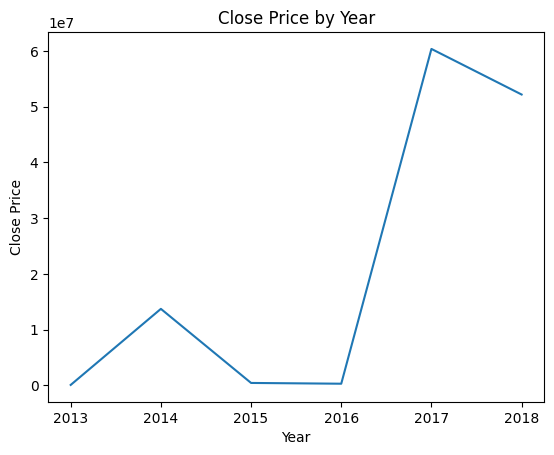

In [23]:
plt.plot(year, price)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Price by Year')

## **Object Oriented Method**

This method is better for complex plots with multiple subplots or when embedding plots in GUIs. It encourages modularity and reusability, especially in scripts or applications that generate plots.

The axes here are in charge of normalizing values.

Text(0.5, 1.0, 'Close Price by Year')

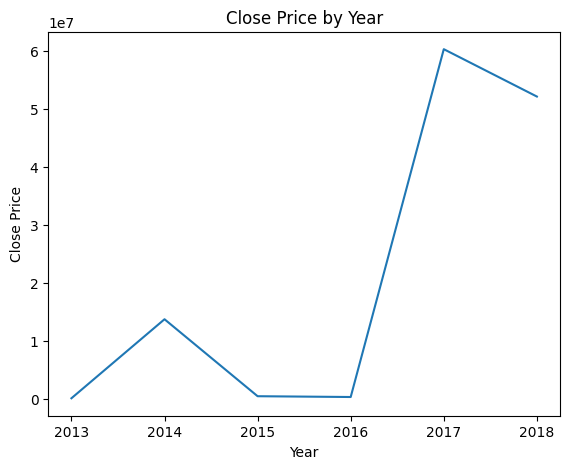

In [24]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(year, price)
axes.set_xlabel('Year')
axes.set_ylabel('Close Price')
axes.set_title('Close Price by Year')

## **Practice!**

Create a data frame by grouping by month Close Price from 2017

In [25]:
price_by_year = df.groupby(df['Date'].dt.year)['Close'].sum(numeric_only = True).reset_index()
price_by_year

,Date,Close
0,2013,7.332313e+04
1,2014,1.371445e+07
2,2015,4.276797e+05
3,2016,2.905734e+05
4,2017,6.033495e+07
5,2018,5.215758e+07


In [26]:
df_2017 = df[df['Date'].dt.year == 2017]
df_2017.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
405,405,2017-01-01,$$$,0.000039,0.000049,0.000020,0.000020,50.0,1769.0
406,406,2017-01-02,$$$,0.000020,0.000041,0.000020,0.000041,36.0,916.0
407,407,2017-01-03,$$$,0.000041,0.000041,0.000031,0.000031,4.0,1875.0
408,408,2017-01-04,$$$,0.000031,0.000045,0.000031,0.000035,3.0,1437.0
409,409,2017-01-05,$$$,0.000035,0.000036,0.000027,0.000030,2.0,1590.0


In [29]:
price_by_month_2017 = df_2017.groupby(df_2017['Date'].dt.month)['Close'].sum(numeric_only = True).reset_index()
price_by_month_2017

,Date,Close
0,1,5.246918e+04
1,2,5.125487e+04
2,3,5.551668e+04
3,4,8.096299e+04
4,5,1.295532e+06
5,6,1.079480e+07
6,7,8.782816e+06
7,8,7.422665e+06
8,9,5.648287e+06
9,10,5.107419e+06


In [30]:
month = list(price_by_month_2017['Date'])
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
price2017 = list(price_by_month_2017['Close'])
price2017

[52469.1820024665,
 51254.8676776699,
 55516.677975713,
 80962.9850913693,
 1295532.3499469394,
 10794801.006264178,
 8782815.61361913,
 7422664.791585325,
 5648287.128104233,
 5107419.096715981,
 3117406.378182041,
 17925821.009572014]

Text(0.5, 1.0, 'Close price by month in 2017')

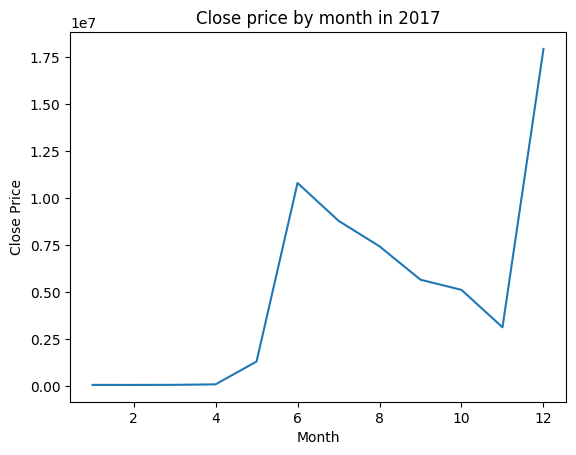

In [32]:
plt.plot(month, price2017)
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('Close price by month in 2017')

Create a subplot inside a fig

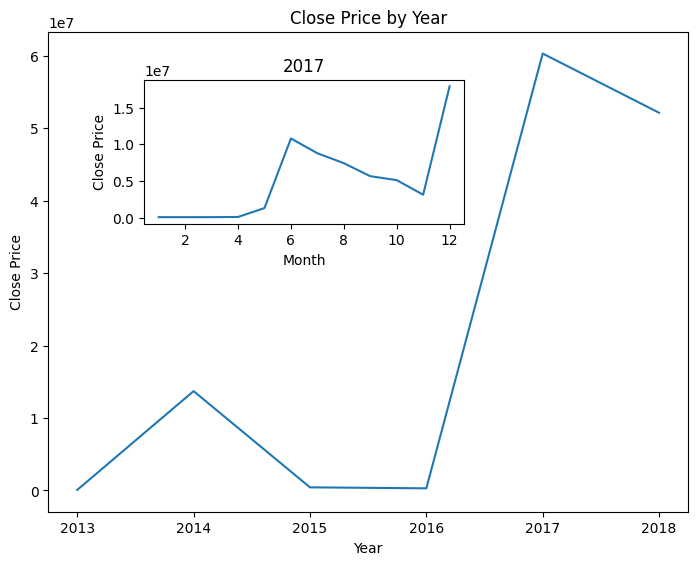

In [34]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,1])
axes.set_xlabel('Year')
axes.set_ylabel('Close Price')
axes.set_title('Close Price by Year')

axes_2017 = fig.add_axes([0.25,0.7,0.5,0.3])
axes_2017.set_xlabel('Month')
axes_2017.set_ylabel('Close Price')
axes_2017.set_title('2017')

axes.plot(year, price)
axes_2017.plot(month, price2017)

#**Chapter 2**

Here we extract all of the data where the year is 2016

In [35]:
df_2016 = df[df['Date'].dt.year == 2016]
df_2016.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
50,50,2016-01-01,$$$,0.000022,0.000030,0.000021,0.000022,3.0,988.0
51,51,2016-01-02,$$$,0.000022,0.000026,0.000022,0.000026,32.0,997.0
52,52,2016-01-03,$$$,0.000026,0.000035,0.000026,0.000034,1.0,1194.0
53,53,2016-01-04,$$$,0.000034,0.000039,0.000034,0.000039,0.0,1579.0
54,54,2016-01-05,$$$,0.000039,0.000104,0.000039,0.000099,0.0,1789.0


In [38]:
df_2016_mth = df_2016.groupby(df_2016['Date'].dt.month)['Close'].sum().reset_index()

In [39]:
df_2016_mth.rename(columns={'Date':'Month', 'Close':'Close Price'}, inplace=True)
df_2016_mth

,Month,Close Price
0,1,25133.533366
1,2,19111.716067
2,3,17030.872605
3,4,16946.889037
4,5,16898.056693
5,6,33241.045320
6,7,28876.745876
7,8,28532.491520
8,9,22723.180301
9,10,25068.666695


Here we cast our info in each column to a list and that way we will be able to plot this data

In [40]:
month_2016 = list(df_2016_mth['Month'])
month_2016

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [41]:
price_2016 = list(df_2016_mth['Close Price'])
price_2016


[25133.533366124,
 19111.716066866098,
 17030.872604949,
 16946.8890370596,
 16898.0566932411,
 33241.0453203244,
 28876.7458764184,
 28532.4915198324,
 22723.1803014516,
 25068.666694672,
 26636.5822720073,
 30373.5874889253]

By adjusting the parameters we can change the amount of rows and columns in the graphs. The subplot is returning a tuple where we have the subplot and the axes.

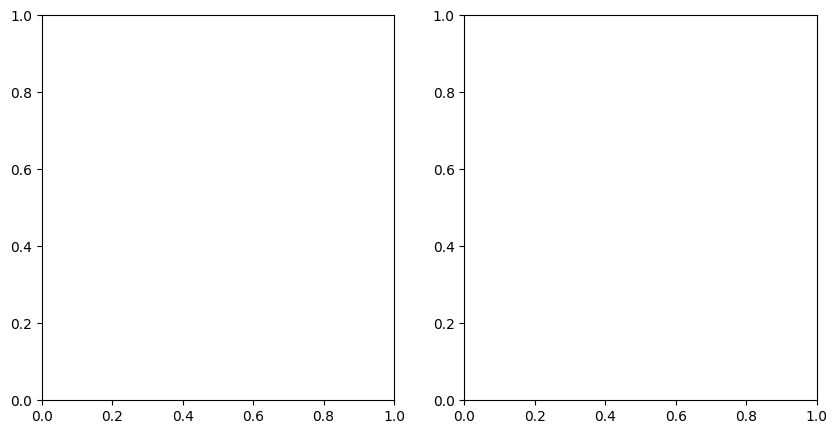

In [43]:
subplot, axes = plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))

In [44]:
type(axes)

numpy.ndarray

In [45]:
axes.size

2

Text(0.5, 1.0, 'Close Price 2017')

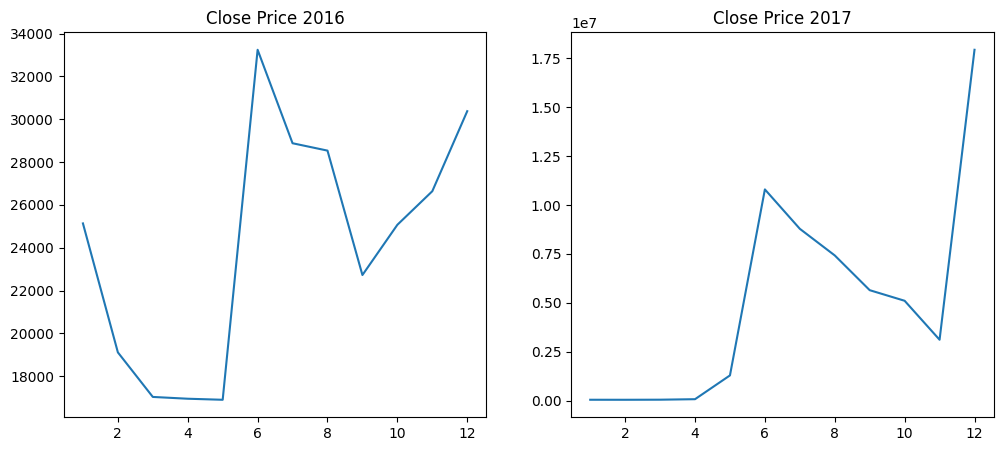

In [46]:
subplot,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
axes[0].plot(month_2016, price_2016)
axes[0].set_title('Close Price 2016')

axes[1].plot(month, price2017)
axes[1].set_title('Close Price 2017')

### **Saving the figure**


In [47]:
subplot.savefig('Bitcoin_2016_2017.png')

### **Adding Legends**

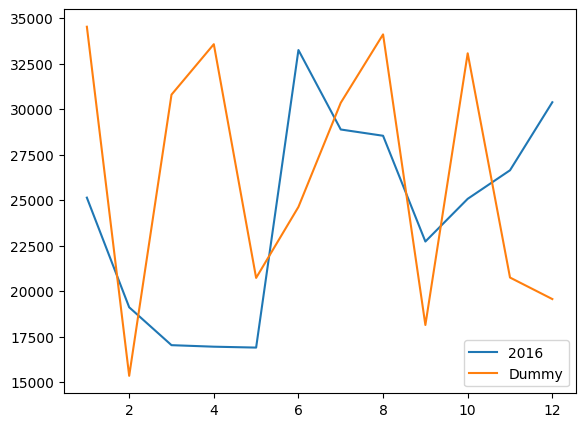

In [48]:
dummy = np.random.randint(15000,35000,len(price_2016))

fig_legends = plt.figure()

ax = fig_legends.add_axes([0.1,0.1,0.8,0.8])
ax.plot(month_2016, price_2016, label = '2016')
ax.plot(month_2016,dummy, label = 'Dummy')

ax.legend()

## **Chapter 3**

We can customize our plots with these different parameters for making our plots visually attractive and distinguishable

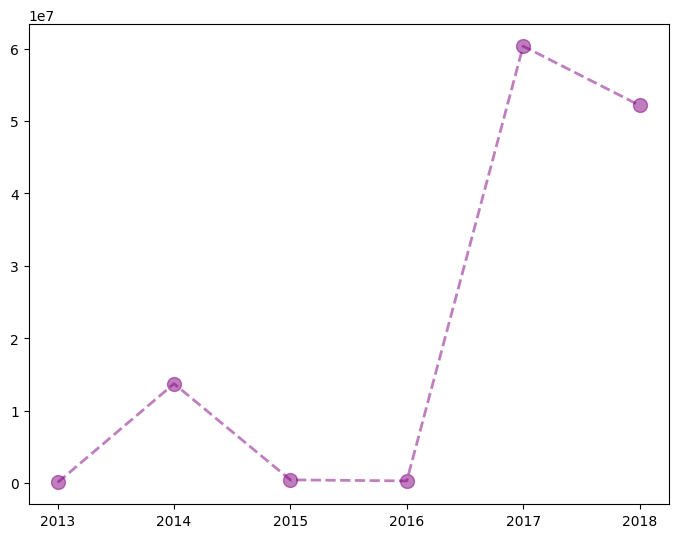

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(year, price, color='purple',lw=2, alpha=0.5,ls='--',marker='o',markersize = 10)